In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 

In [151]:
df = pd.read_csv("kc_house_data.csv")
df.drop("date", axis = 1, inplace = True)
df.drop('id', axis = 1, inplace= True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [152]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [153]:
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


important features : 
floors / bedrooms / bathrooms / sqft_living	/ sqft_lot	/ waterfront	view / condition / grade / sqft_above / sqft_basement / yr_built	yr_renovated / sqft_living15 / sqft_lot15



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


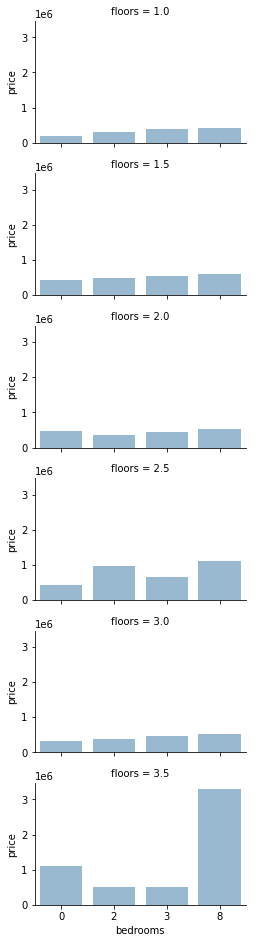

In [154]:
grid = sns.FacetGrid(df, row="floors", size=2.2, aspect=1.6)
grid.map(sns.barplot, "bedrooms", 'price', alpha=.5, ci=None)
grid.add_legend()

In [155]:
bathrooms = []
for i in df["bathrooms"]:
  bathrooms.append(round(i))
df["bathrooms"] = bathrooms

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


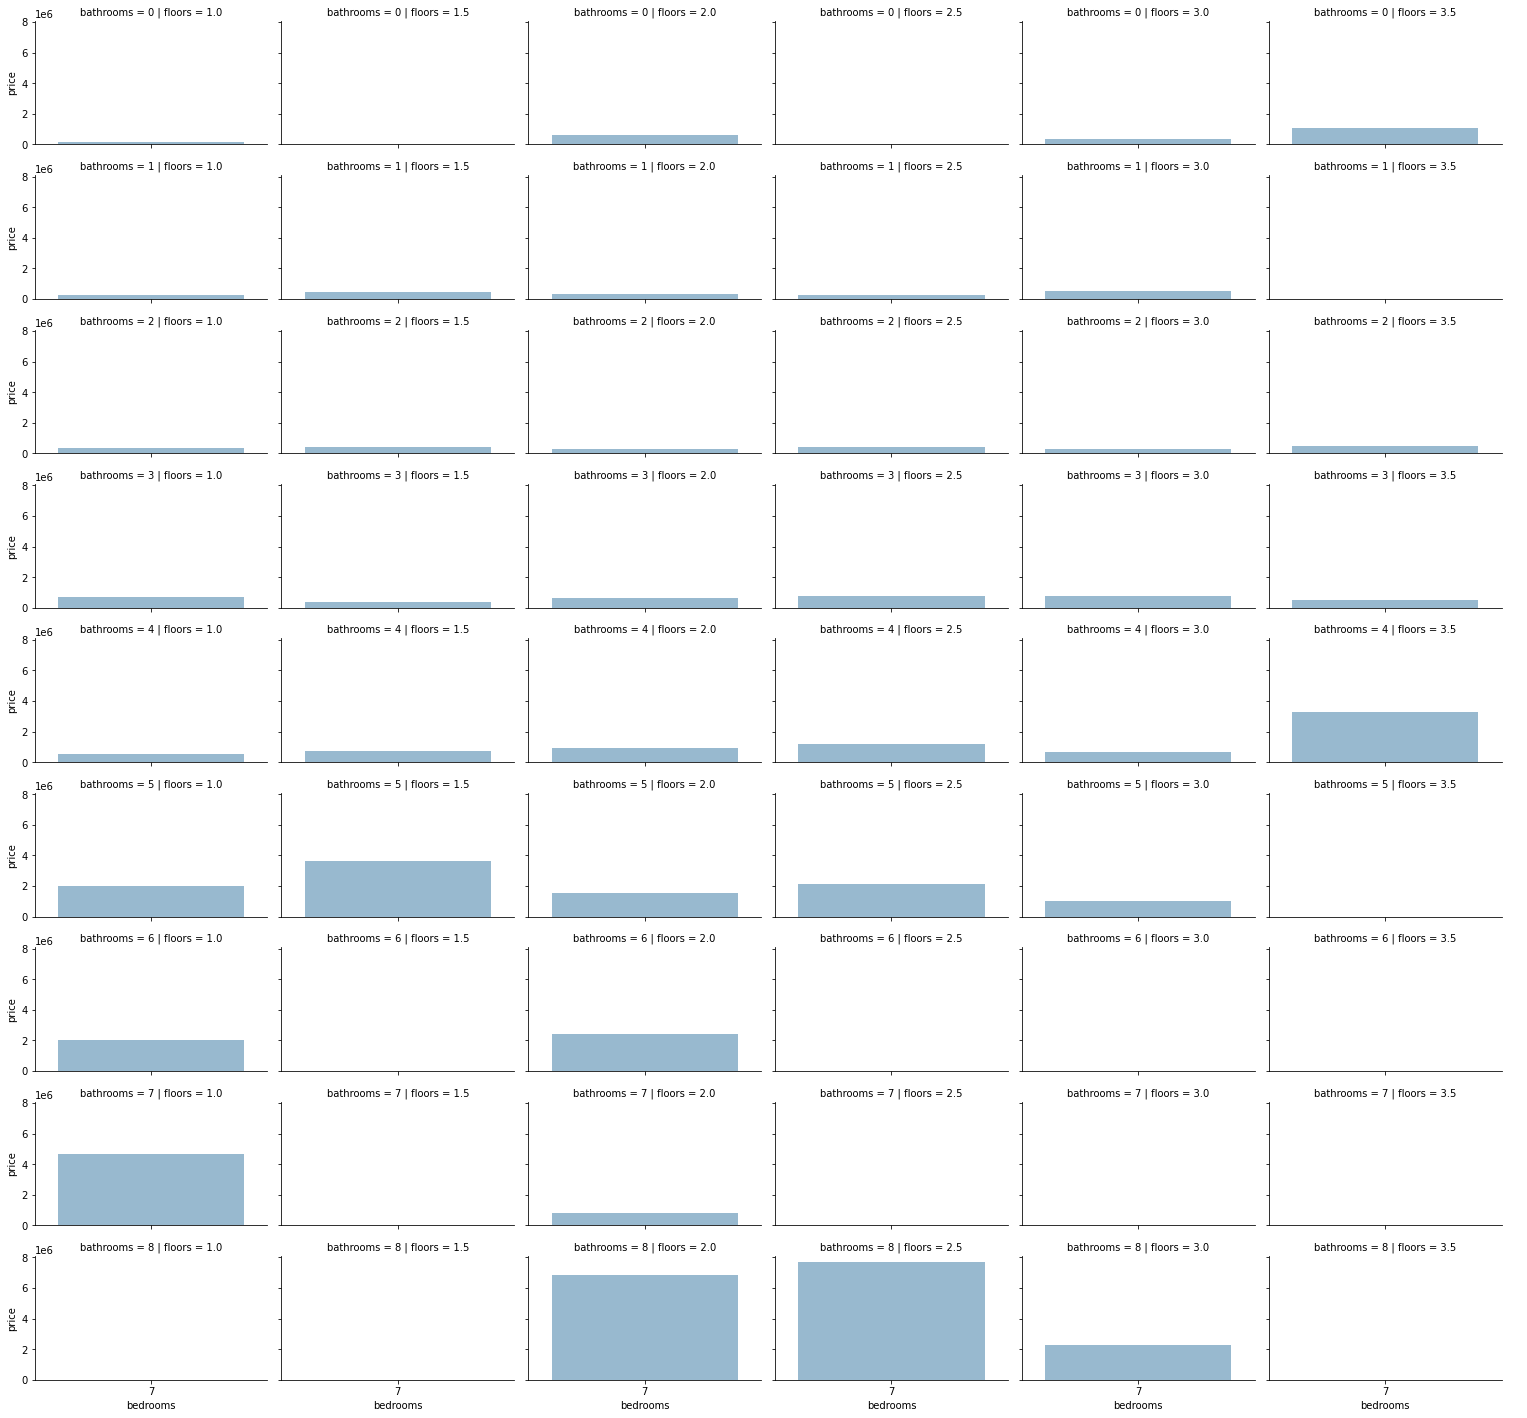

In [156]:
grid = sns.FacetGrid(df, col="floors", row="bathrooms", size=2.2, aspect=1.6)
grid.map(sns.barplot, "bedrooms", 'price', alpha=.5, ci=None)
grid.add_legend()

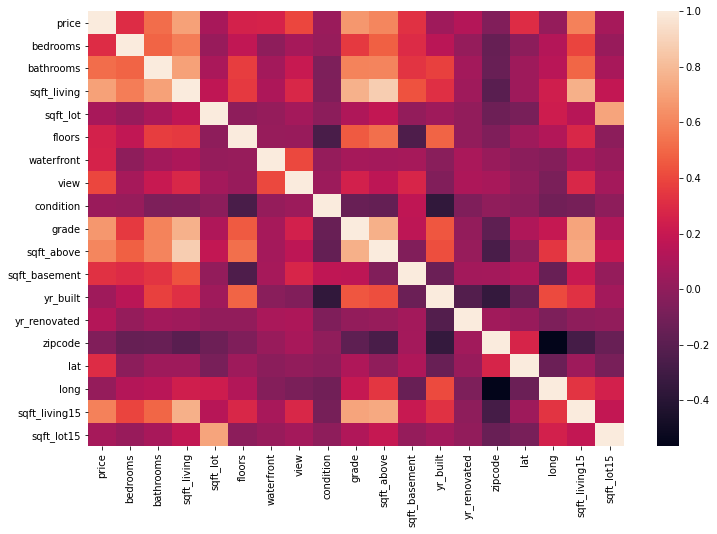

In [157]:
fig_dims = (12,8)
fig , ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df.corr(), ax = ax)
plt.show()

In [158]:
abs(df.corr()["price"])

price            1.000000
bedrooms         0.308350
bathrooms        0.518912
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode          0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

important features  : bedrooms, bathrooms, sqft_living, floors, waterfront, view, grade, sqft_above, sqft_basement

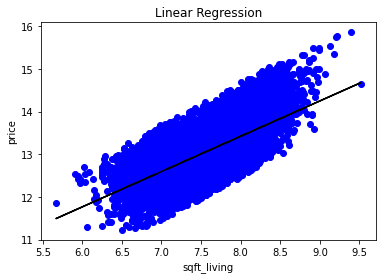

MSE 0.15042865751228093
R squared 0.4635796659364356


In [159]:
inputs = df["sqft_living"]
targets = df.price
x = np.log(inputs)
y = np.log(targets)
X = x.values.reshape(-1,1)
#splitting the data
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.35,random_state=0)
#applying the linear regression
model = LinearRegression() 
model.fit(x_train,y_train)
#showing the plot
plt.scatter(X,y,color="b")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X,model.predict(X),color="k")
plt.show()
#measuring the performance
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


In [160]:
x1 = df[["sqft_living","bedrooms","bedrooms","bathrooms","floors",   "grade", "sqft_above"]]
y1 = df.price
Y1 = np.log(y1)

#splitting the data
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,Y1,test_size=0.35  ,random_state=40)

#applying the regression
model1 = LinearRegression() 
model1.fit(x1_train,y1_train)

#measuring the performance
predicted1=model1.predict(x1_test)
print("MSE", mean_squared_error(y1_test,predicted1))
print("R squared", metrics.r2_score(y1_test,predicted1))

MSE 0.12027328190665526
R squared 0.5617491177151239


as we see 0.15 < 0.12 so the multi-linear regression is more precise than the lineal regression 

In [161]:
poly = PolynomialFeatures(degree = 2) 
x_=poly.fit_transform(X)
x_train_fit = poly.fit_transform(x_train)
model.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = model.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.1416002091632759
R squared:  0.4950614280617779


the mse value for the polynomial regression is 0.14 so we can conclude that it's more accurate than the linealregression but less accurate than the multilinear regression

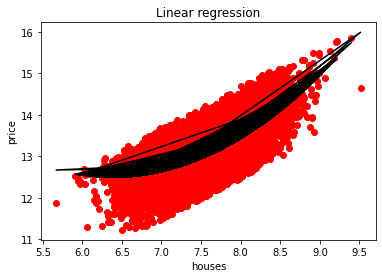

In [162]:
plt.scatter(X, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("houses")
plt.plot(X, model.predict(poly.fit_transform(X)), color="k") 